In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [89]:
# retrieve the CSV data from my computer and create a pandas data frame
TEDSA = pd.read_csv('''/Users/Kate/Desktop/Python for Everybody Specialization/Course 5 - Capstone/Weeks 3, 5, 7 - Side project/TEDSA_2015_PUF.csv''')

In [90]:
# input the data into a SQL database
connection = sqlite3.connect("SIDEPROJECT.sqlite")  
cur = connection.cursor()  

In [91]:
TEDSA.to_sql(name="TEDSA", con=connection) #, if_exists="append", index=False) 

In [92]:
# now we have a sql database, we can delete the TEDSA dataframe to free up memory
del(TEDSA)

In [109]:
# create dictionaries for the numerical coding of data from SAMHDA data source
State_dict = {1:"Alabama",2:"Alaska", 4:"Arizona", 5:"Arkensas", 6:"California", 8:"Colorado", 9:"Connecticut",
             10:"Delaware", 11: "District of Columbia", 12: "Florida", 15:"Hawaii", 16:"Idaho", 17:"Illinois",
             18:"Indiana", 19:"Iowa", 21:"Kentucky", 22:"Louisiana", 23:"Maine", 24:"Maryland", 25:"Massachusetts",
             26: "Michigan", 27:"Minnesota", 28:"Mississippi", 29:"Missouri", 30:"Montana", 31:"Nebraska", 
             32:"Nevada", 33:"New Hampshire", 34:"New Jersey", 35:"New Mexico", 36:"New York", 37:"North Carolina",
             38:"North Dakota", 39:"Ohio", 40:"Oklahoma", 44:"Rhode Island", 46:"South Dakota", 47:"Tennessee",
             48:"Texas", 49:"Utah", 50:"Vermont", 51:"Virginia", 53:"Washington", 54:"West Virginia", 55:"Wisconsin",
             56: "Wyoming", 72:"Puerto Rico"}

In [102]:
cur.execute("SELECT REGION,STFIPS,COUNT(CASEID) from TEDSA group by REGION,STFIPS")

In [103]:
state_table_with_codes = cur.fetchall()

In [116]:
# make region-to-color code dictionary

region_color = {0:'black', 1:'blue', 2:'red', 3:'green', 4:'cyan'}

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 <a list of 47 Text xticklabel objects>)

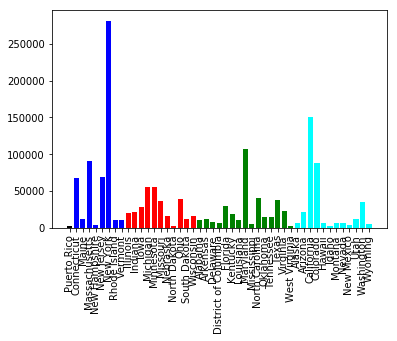

In [118]:
colors = list()
states = list()
episodes = list()
for entry in state_table_with_codes:
    colors.append(region_color[entry[0]])
    states.append(State_dict[entry[1]])
    episodes.append(entry[2])
    
%matplotlib inline

plt.bar(states, episodes, color=colors)

plt.xticks(rotation=90)

In [105]:
state_table_with_codes

[(0, 72, 2343),
 (1, 9, 67706),
 (1, 23, 12046),
 (1, 25, 91164),
 (1, 33, 3580),
 (1, 34, 68628),
 (1, 36, 281335),
 (1, 44, 11152),
 (1, 50, 10318),
 (2, 17, 20587),
 (2, 18, 21362),
 (2, 19, 28578),
 (2, 26, 55180),
 (2, 27, 55346),
 (2, 29, 36131),
 (2, 31, 16463),
 (2, 38, 2900),
 (2, 39, 39046),
 (2, 46, 12056),
 (2, 55, 16296),
 (3, 1, 11074),
 (3, 5, 11753),
 (3, 10, 7900),
 (3, 11, 6053),
 (3, 12, 30104),
 (3, 21, 19001),
 (3, 22, 10515),
 (3, 24, 107509),
 (3, 28, 4823),
 (3, 37, 39917),
 (3, 40, 14430),
 (3, 47, 14916),
 (3, 48, 37370),
 (3, 51, 22910),
 (3, 54, 3029),
 (4, 2, 6496),
 (4, 4, 20865),
 (4, 6, 150071),
 (4, 8, 87689),
 (4, 15, 6371),
 (4, 16, 2684),
 (4, 30, 5908),
 (4, 32, 6630),
 (4, 35, 4445),
 (4, 49, 11939),
 (4, 53, 34843),
 (4, 56, 5563)]